#Подготовка

In [ ]:
!wget -r -N -c -np https://physionet.org/files/sddb/1.0.0/
!pip install wfdb

In [2]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import h5py
from scipy.signal import find_peaks
import scipy.stats
from IPython.display import display
from scipy.signal import butter, lfilter
from scipy.signal import freqs
import scipy.io.wavfile as wavfile

In [3]:
header = wfdb.rdheader('physionet.org/files/sddb/1.0.0/30')

#Основная часть

In [4]:
record = wfdb.rdrecord('physionet.org/files/sddb/1.0.0/30')
signal_0 = record.p_signal[:, 0]
signal = record.p_signal
record_frequency = record.fs


Для начала просто выведу запись



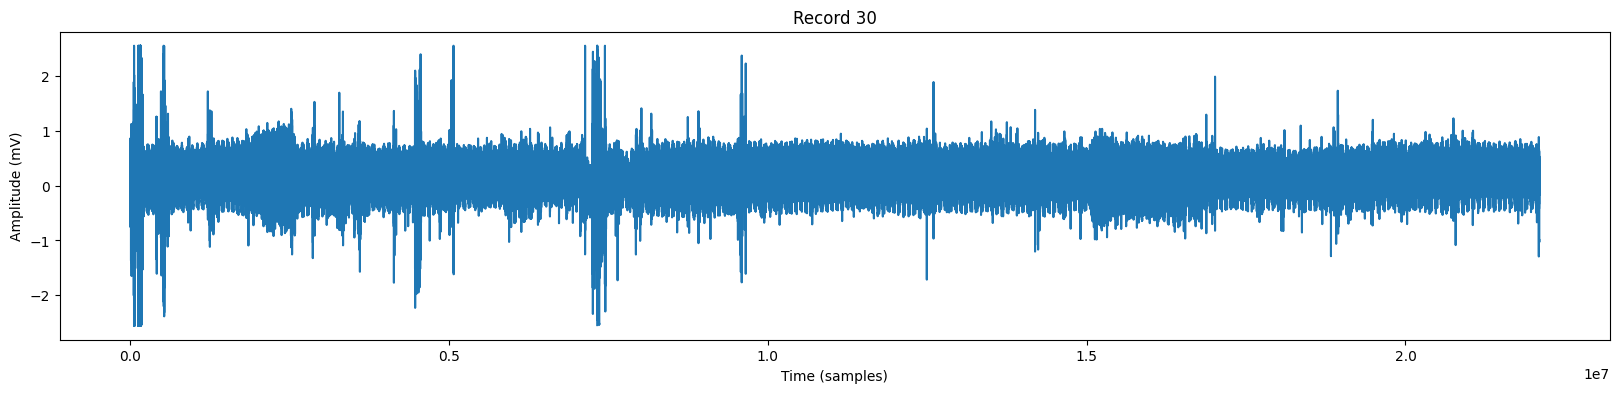

In [5]:
plt.figure(figsize=(20, 4))
plt.plot(signal_0)
plt.title('Record 30')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.show()

Представила еще немного в другом формате

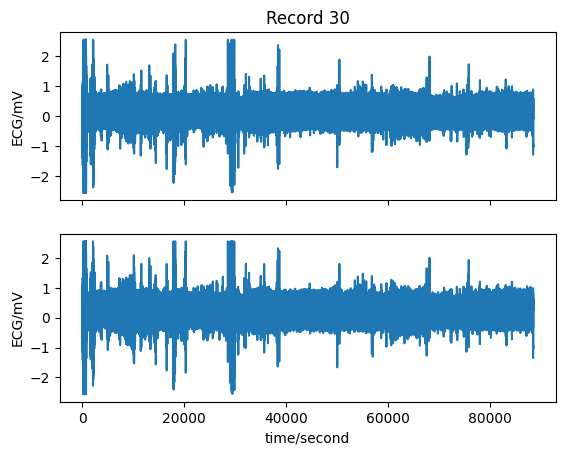

In [14]:
wfdb.plot_wfdb(record = record, title = 'Record 30')
#display(record.__dict__)

In [23]:
import scipy.signal

Попробую просто вывести спектрограмму для кусочка записи длинной в 30 секунд

In [31]:
new_signal = signal_0[:30 *record_frequency]

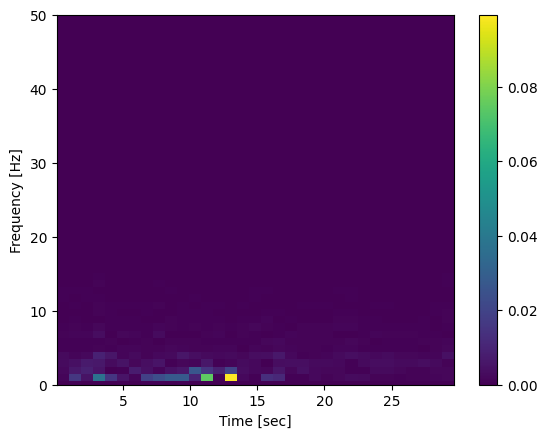

In [39]:
f, t, Sxx = scipy.signal.spectrogram(x = new_signal,  fs = record_frequency)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label= '')
plt.ylim([0, 50])
plt.show()

Получилось что-то не очень красивое и понятное

Дальше пробую по-другому выводить спектрограммы


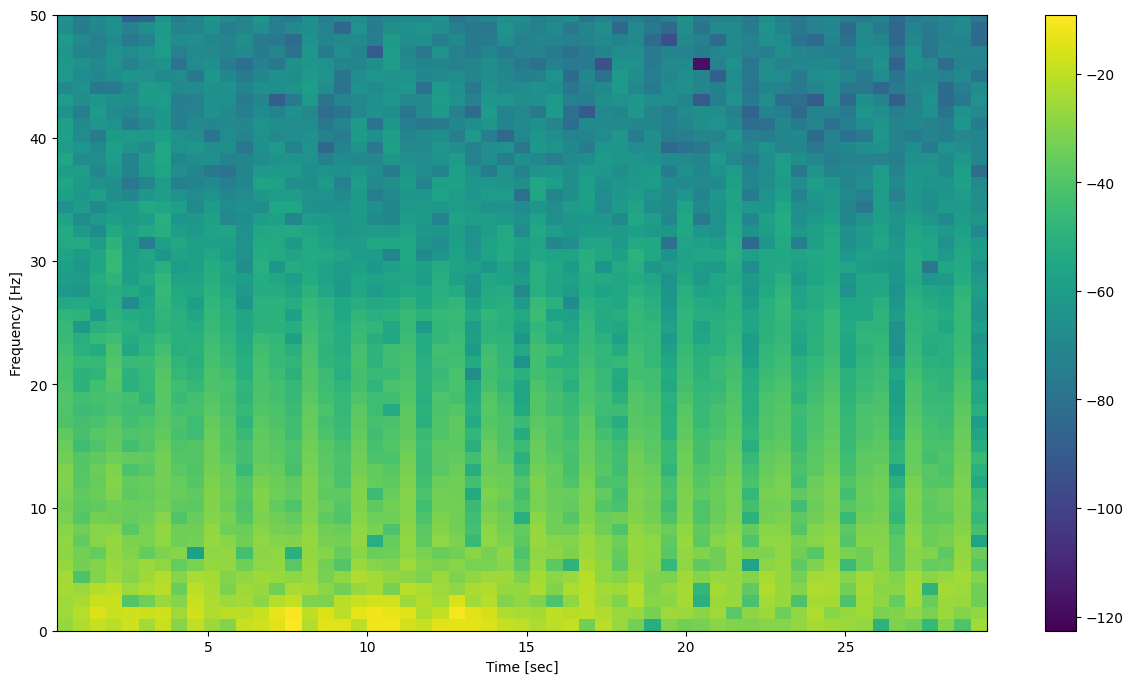

In [52]:
plt.figure(figsize=(15,8))
plt.specgram(new_signal, Fs=record_frequency)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 50])
plt.colorbar(label= '')
plt.show()

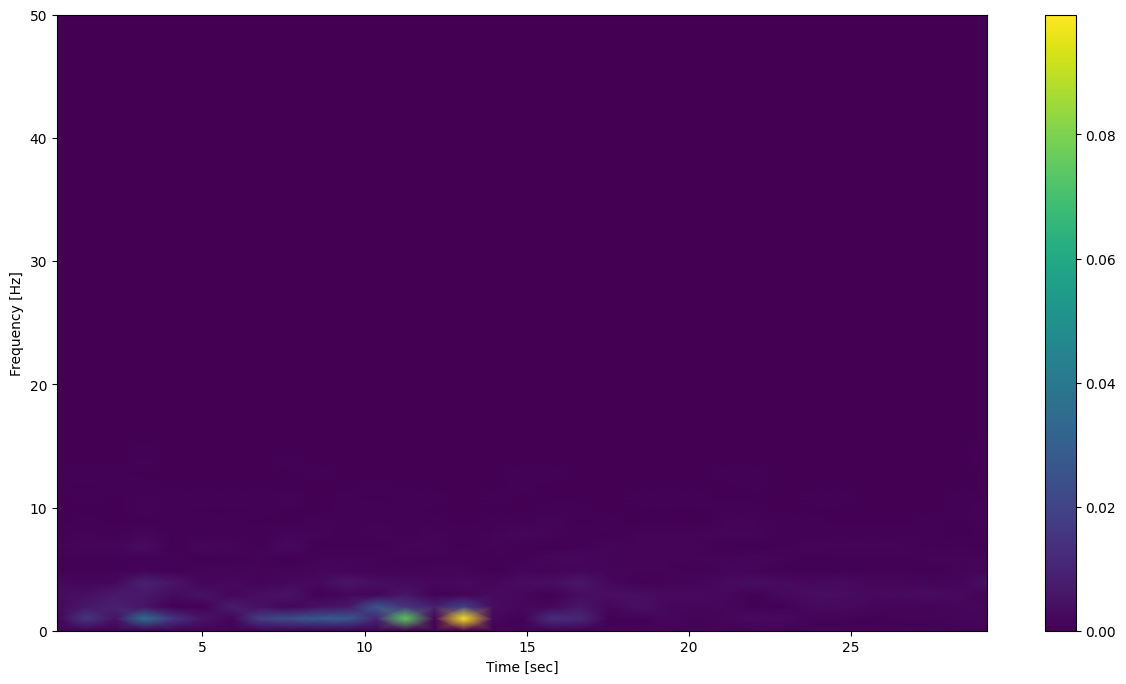

In [51]:
f, t, Sxx = signal.spectrogram(new_signal, record_frequency)
plt.figure(figsize=(15,8))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label= '')
plt.ylim([0, 50])
plt.show()

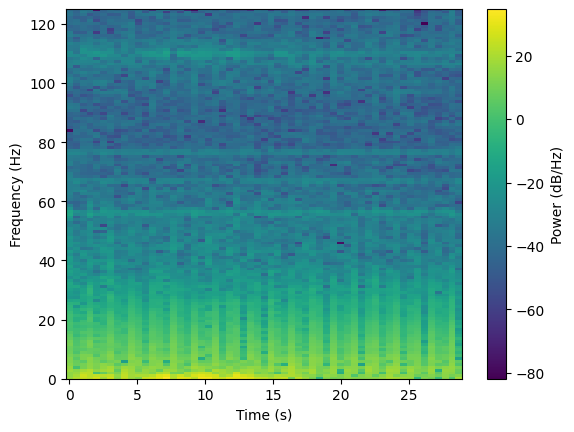

In [50]:
window_size = 256
overlap    = 128

window = np.hanning(window_size)
windows = [new_signal[i:i+window_size] * window for i in range(0, len(new_signal)-window_size, window_size-overlap)]

spectrogram = [np.abs(np.fft.rfft(win))**2 for win in windows]


spectrogram = np.array(spectrogram).T

frequencies = np.fft.rfftfreq(window_size, d=1.0/record_frequency)
time = np.arange(len(spectrogram[0])) * (window_size - overlap) / record_frequency
plt.pcolormesh(time, frequencies, 10 * np.log10(spectrogram))
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Power (dB/Hz)")
plt.ylim([0, record_frequency/2.])
plt.show()

Некоторые идеи брала отсюда: https://scicoding.com/how-to-do-spectrogram-in-python/